<head>
    <style>
        .md-typeset h2 {
            margin:0;
            }
        .md-typeset h3 {
            margin:0;
            }
        .jupyter-wrapper table.dataframe tr, .jupyter-wrapper table.dataframe th, .jupyter-wrapper table.dataframe td {
            text-align:left;
            }
        .jupyter-wrapper table.dataframe {
            table-layout: auto;
            }
        .jp-RenderedText pre {
            display: inline-block;
            overflow-x: auto;
            width: max-content;
        }
    </style>
</head>

# Lab 2: Replicate Thornton's Paper

This paper evaluates an experiment in which individuals in rural Malawi were randomly assigned monetary
incentives to learn their HIV results after being tested. 

## Getting to know the dataset

In [1]:
* load the dataset
use "./data/lab2/Thornton-HIV-Testing-Data.dta", clear

In [9]:
// set the format
// https://www.stata.com/manuals/restimationoptions.pdf
set cformat %7.3f

In [16]:
* check variables
describe, simple

site          distvct       male          a8            followup_t~d
rumphi        tinc          mar           land2004      followupsu~y
balaka        Ti            educ2004      T_consentsti  havesex_fo
villnum       any           timeshadse~s  T_consenthiv  numsex_fo
m1out         under         hadsex12      T_final_tr~t  likelihood~o
m2out         over          eversex       T_final_re~t  numcond
survey2004    simaverage    usecondom04   T_final_re~c  anycond
got           age           tb            hiv2004       bought
zone          age2          thinktreat    test2004      MainSample


In [2]:
describe site got tinc any age male 


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
site            float   %9.0g                 1=Mchinji 2=Balaka 3=Rumphi
got             float   %9.0g                 Got HIV results
tinc            float   %9.0g                 Total value of the incentive
                                                (kwacha)
any             float   %9.0g                 Received any incentive
age             float   %10.0g                Age
male            float   %9.0g                 Gender


In [3]:
* convert tinc to dollars
replace tinc = tinc * 0.009456  // exchange rate at jan1 2005

(2,222 real changes made)


In [4]:
* Generate the main sample for the paper
gen MainSample = 1 if test2004==1 & age!=. & /// 
    villnum!=. & tinc!=. & distvct!=. & /// 
    hiv2004!=-1 & followup_test!=1

(2,008 missing values generated)


In [13]:
tab Main  // size of main sample 


 MainSample |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |      2,812      100.00      100.00
------------+-----------------------------------
      Total |      2,812      100.00


In [19]:
tab followupsu if Main==1 & site != 1 


        Was |
interviewed |
         at |
  follow-up |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        497       24.59       24.59
          1 |      1,524       75.41      100.00
------------+-----------------------------------
      Total |      2,021      100.00


## Determinants of accepting an HIV test

We will run regressions with and without clustering standard errors. 

(bin=36, start=1, width=4)


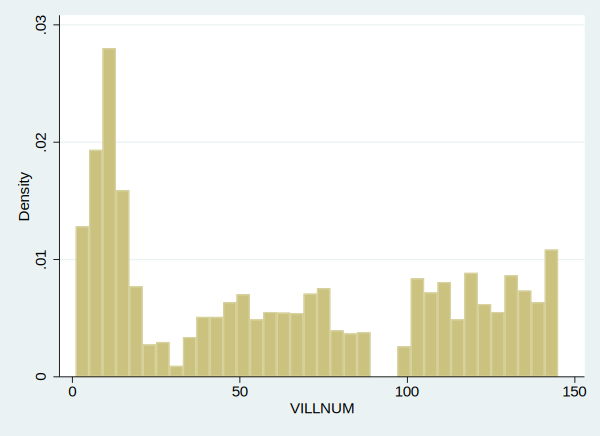

In [5]:
hist villnum

In [53]:
** Panel B: Determinants of accepting an HIV test
reg test2004 male age age2 mar tb rumphi balaka , robust ///
                cluster(villnum)  noci noheader

     (Std. Err. adjusted for 123 clusters in villnum)
-----------------------------------------------------
             |               Robust
    test2004 |      Coef.   Std. Err.      t    P>|t|
-------------+---------------------------------------
        male |     -0.004      0.009    -0.44   0.663
         age |      0.002      0.003     0.81   0.420
        age2 |     -0.000      0.000    -0.73   0.468
         mar |     -0.020      0.017    -1.15   0.254
          tb |      0.062      0.011     5.58   0.000
      rumphi |      0.010      0.019     0.56   0.578
      balaka |      0.006      0.021     0.30   0.762
       _cons |      0.874      0.046    18.86   0.000
-----------------------------------------------------


We can see that the variable _tb_ (HIV Test before baseline) is highly significant. 

In [54]:
reg test2004 male age age2 mar tb rumphi balaka /// 
            thinktreat likelihoodhiv_fo, robust cluster(villnum) ///
            noci noheader

note: balaka omitted because of collinearity
          (Std. Err. adjusted for 57 clusters in villnum)
---------------------------------------------------------
                 |               Robust
        test2004 |      Coef.   Std. Err.      t    P>|t|
-----------------+---------------------------------------
            male |      0.009      0.006     1.59   0.118
             age |     -0.000      0.001    -0.40   0.690
            age2 |      0.000      0.000     0.27   0.786
             mar |     -0.017      0.005    -3.46   0.001
              tb |      0.010      0.007     1.48   0.144
          rumphi |     -0.001      0.006    -0.10   0.921
          balaka |      0.000  (omitted)
      thinktreat |     -0.008      0.006    -1.36   0.179
likelihoodhiv_fo |      0.000      0.000     0.16   0.875
           _cons |      1.004      0.017    57.91   0.000
---------------------------------------------------------


Notice that people who got married are less likely to get a HIV test and 
coefficient is also significant

(bin=36, start=1, width=4)


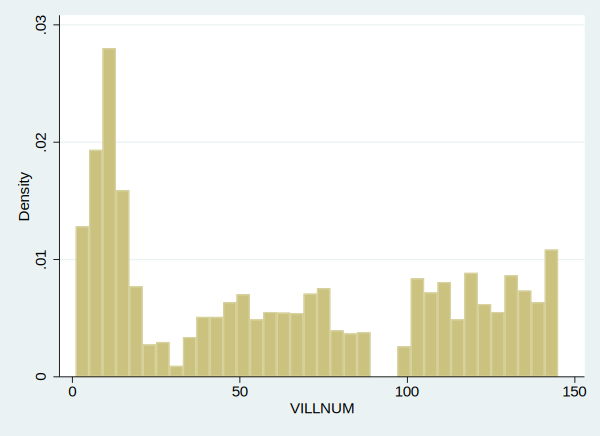

In [7]:
hist villnum

In [8]:
* Panel A: Respondent Characteristics
sum male age mar educ2004 tinc distvct land2004 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        male |      4,820    .4688797    .4990824          0          1
         age |      4,379    33.65175    13.16286         11         84
         mar |      3,507    .7254063    .4463729          0          1
    educ2004 |      3,154    3.494927    3.684015          0         12
        tinc |      2,901    104.4881    95.32153          0        300
-------------+---------------------------------------------------------
     distvct |      4,820    2.002633    1.256524          0   5.191559
    land2004 |      3,262    .7446352    .4361329          0          1


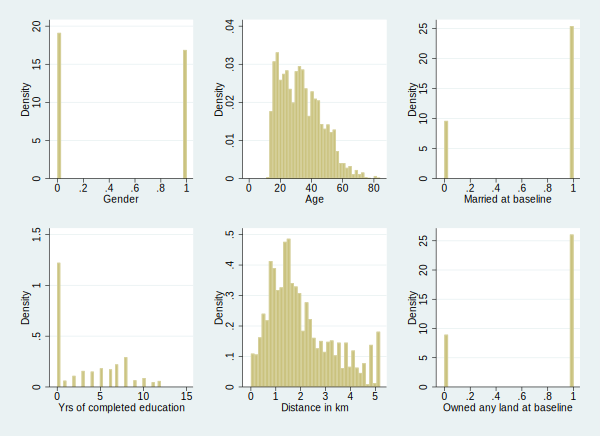

In [24]:
graph drop _all
quietly hist male, name(a)
quietly hist age, name(b)
quietly hist mar, name(c)
quietly hist educ2004, name(d)
quietly hist distvct, name(e)
quietly hist land2004, name(f)
graph combine a b c d e f

## Impact of incentives and sitance on learning HIV results 

We can show that both incentives and distance to the center had large
effects on seeking HIV results. 

In [7]:
tab got


    Got HIV |
    results |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        878       30.34       30.34
          1 |      2,016       69.66      100.00
------------+-----------------------------------
      Total |      2,894      100.00


In [30]:
tab any, sum(got)


   Received |
        any |     Summary of Got HIV results
  incentive |        Mean   Std. Dev.       Freq.
------------+------------------------------------
          0 |   .33868379   .47364245         623
          1 |   .78923564   .40794364       2,211
------------+------------------------------------
      Total |   .69019054   .46249652       2,834


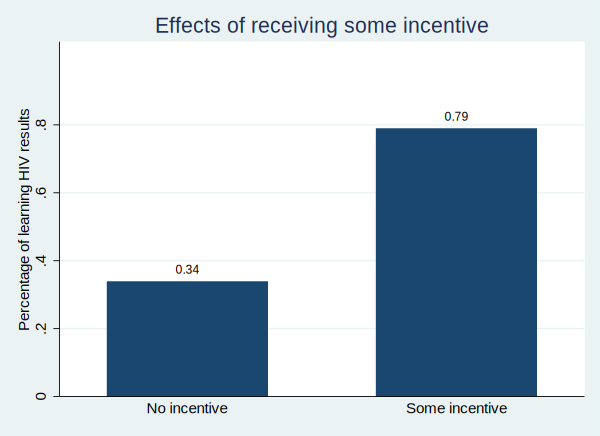

In [51]:
graph bar got, over(any, relabel(1 "No incentive" 2 "Some incentive")) /// 
    title("Effects of receiving some incentive") ///
    ytitle("Percentage of learning HIV results") /// 
    blabel(bar, format(%9.2f)) ///
    yscale(r(0, 1))

In [ ]:
// categorize incentive
gen Ti2 =.2 if tinc<.2 & tinc>0 
replace Ti2 =.5 if tinc<.5 & tinc>=.2 
replace Ti2 =1 if tinc<1 & tinc>=.5 
replace Ti2 =1.5 if tinc<1.5 & tinc>=1
replace Ti2 =2 if tinc<2 & tinc>=1.5 
replace Ti2 =2.5 if tinc<2.8 & tinc>=2 
replace Ti2 =3 if tinc>=2.8

In [43]:
tab Ti2, sum(got)


            |     Summary of Got HIV results
        Ti2 |        Mean   Std. Dev.       Freq.
------------+------------------------------------
         .2 |   .63679245   .48206221         212
         .5 |    .6954023   .46089952         348
          1 |   .77241379   .41963596         580
        1.5 |   .84210526   .36560566         190
          2 |   .87033399    .3362661         509
        2.5 |   .86092715   .34717402         151
          3 |   .87900356   .32670498         281
------------+------------------------------------
      Total |   .79480405   .40393368       2,271


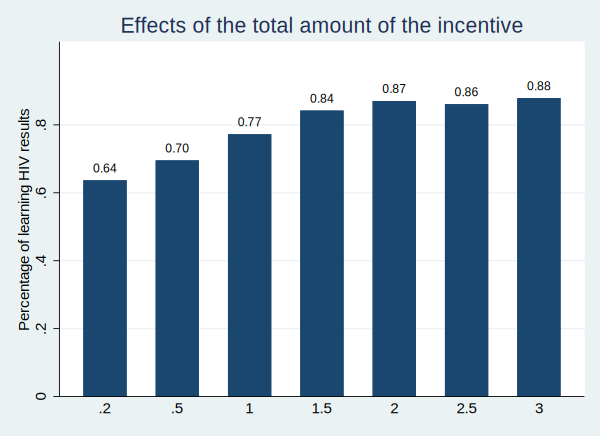

In [50]:
graph bar got, over(Ti2) /// 
    title("Effects of the total amount of the incentive") /// 
    ytitle("Percentage of learning HIV results") /// 
    blabel(bar, format(%9.2f)) /// 
    yscale(r(0, 1))

In [59]:
// generate distance square 
gen distvcts = distvct*distvct

In [55]:
reg got any male hiv2004 age age2 rumphi balaka, /// 
                robust cluster(villnum) noci noheader

     (Std. Err. adjusted for 119 clusters in villnum)
-----------------------------------------------------
             |               Robust
         got |      Coef.   Std. Err.      t    P>|t|
-------------+---------------------------------------
         any |      0.433      0.023    19.01   0.000
        male |     -0.009      0.018    -0.50   0.617
     hiv2004 |     -0.041      0.029    -1.40   0.163
         age |      0.005      0.003     1.58   0.117
        age2 |     -0.000      0.000    -0.96   0.341
      rumphi |     -0.137      0.029    -4.71   0.000
      balaka |     -0.119      0.023    -5.09   0.000
       _cons |      0.341      0.059     5.76   0.000
-----------------------------------------------------


In [56]:
reg got any tinc male hiv2004 age age2 rumphi balaka, ///
                robust cluster(villnum) noci noheader

     (Std. Err. adjusted for 119 clusters in villnum)
-----------------------------------------------------
             |               Robust
         got |      Coef.   Std. Err.      t    P>|t|
-------------+---------------------------------------
         any |      0.311      0.026    12.09   0.000
        tinc |      0.092      0.012     7.88   0.000
        male |     -0.013      0.018    -0.70   0.484
     hiv2004 |     -0.041      0.030    -1.37   0.172
         age |      0.004      0.003     1.43   0.154
        age2 |     -0.000      0.000    -0.76   0.448
      rumphi |     -0.155      0.029    -5.37   0.000
      balaka |     -0.124      0.024    -5.19   0.000
       _cons |      0.360      0.058     6.19   0.000
-----------------------------------------------------


In [57]:
// no distance but with over - indicator of living over 1.5 km from
// the assigned VCT center 
reg got any tinc over simave male hiv2004 age age2 ///
         rumphi balaka, robust cluster(villnum) noci noheader

     (Std. Err. adjusted for 119 clusters in villnum)
-----------------------------------------------------
             |               Robust
         got |      Coef.   Std. Err.      t    P>|t|
-------------+---------------------------------------
         any |      0.311      0.025    12.21   0.000
        tinc |      0.091      0.012     7.90   0.000
        over |     -0.035      0.023    -1.55   0.124
  simaverage |     -0.007      0.012    -0.63   0.530
        male |     -0.012      0.018    -0.69   0.491
     hiv2004 |     -0.045      0.029    -1.53   0.128
         age |      0.005      0.003     1.59   0.115
        age2 |     -0.000      0.000    -0.89   0.377
      rumphi |     -0.151      0.029    -5.23   0.000
      balaka |     -0.111      0.026    -4.22   0.000
       _cons |      0.386      0.061     6.33   0.000
-----------------------------------------------------


In [60]:
// with distance and distance squared 
reg got any tinc distvct distvcts simave male /// 
        hiv2004 age age2 rumphi balaka, robust cluster(villnum) ///
        noci noheader

     (Std. Err. adjusted for 119 clusters in villnum)
-----------------------------------------------------
             |               Robust
         got |      Coef.   Std. Err.      t    P>|t|
-------------+---------------------------------------
         any |      0.313      0.025    12.31   0.000
        tinc |      0.091      0.012     7.81   0.000
     distvct |     -0.074      0.027    -2.72   0.008
    distvcts |      0.010      0.005     2.05   0.043
  simaverage |      0.004      0.013     0.30   0.762
        male |     -0.013      0.018    -0.70   0.483
     hiv2004 |     -0.046      0.029    -1.57   0.120
         age |      0.005      0.003     1.54   0.126
        age2 |     -0.000      0.000    -0.84   0.401
      rumphi |     -0.145      0.028    -5.12   0.000
      balaka |     -0.115      0.025    -4.56   0.000
       _cons |      0.431      0.068     6.37   0.000
-----------------------------------------------------


Now, we will run the probit model to see wheather results will be same 
or different. 

In [72]:
dprobit got any male hiv2004 age age2 rumphi balaka, ///
            robust cluster(villnum) nolog


Probit regression, reporting marginal effects           Number of obs =   2825
                                                        Wald chi2(7)  = 405.09
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -1495.7847                       Pseudo R2     = 0.1429

                              (Std. Err. adjusted for 119 clusters in villnum)
------------------------------------------------------------------------------
         |               Robust
     got |      dF/dx   Std. Err.      z    P>|z|     x-bar  [    95% C.I.   ]
---------+--------------------------------------------------------------------
     any*|   .4395931   .0222769    18.77   0.000   .780177   .395931  .483255
    male*|   -.010096   .0209404    -0.48   0.630   .463009  -.051138  .030946
 hiv2004 |   -.046928   .0323578    -1.45   0.147   .057699  -.110348  .016492
     age |   .0053062    .003504     1.51   0.130   33.3961  -.001561  .012174
    age2 |  -.0000

In [68]:
dprobit got any tinc male hiv2004 age age2 ///
         rumphi balaka, robust cluster(villnum) 


Iteration 0:   log pseudolikelihood = -1745.1401
Iteration 1:   log pseudolikelihood = -1461.0254
Iteration 2:   log pseudolikelihood = -1457.4825
Iteration 3:   log pseudolikelihood = -1457.4782

Probit regression, reporting marginal effects           Number of obs =   2825
                                                        Wald chi2(8)  = 406.49
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -1457.4782                       Pseudo R2     = 0.1648

                              (Std. Err. adjusted for 119 clusters in villnum)
------------------------------------------------------------------------------
         |               Robust
     got |      dF/dx   Std. Err.      z    P>|z|     x-bar  [    95% C.I.   ]
---------+--------------------------------------------------------------------
     any*|    .280518   .0295452     9.88   0.000   .780177    .22261  .338426
    tinc |   .1148724   .0155779     7.25   0.000   1.0053

In [61]:
// with distances
dprobit got any tinc distvct distvcts simave male ///
         hiv2004 age age2 rumphi balaka, robust cluster(villnum)


Iteration 0:   log pseudolikelihood = -1745.1401
Iteration 1:   log pseudolikelihood = -1452.3321
Iteration 2:   log pseudolikelihood = -1448.0158
Iteration 3:   log pseudolikelihood = -1448.0089

Probit regression, reporting marginal effects           Number of obs =   2825
                                                        Wald chi2(11) = 448.71
                                                        Prob > chi2   = 0.0000
Log pseudolikelihood = -1448.0089                       Pseudo R2     = 0.1703

                              (Std. Err. adjusted for 119 clusters in villnum)
------------------------------------------------------------------------------
         |               Robust
     got |      dF/dx   Std. Err.      z    P>|z|     x-bar  [    95% C.I.   ]
---------+--------------------------------------------------------------------
     any*|    .284861   .0293633    10.07   0.000   .780177    .22731  .342412
    tinc |   .1150127   .0157515     7.24   0.000   1.0053

## Potential outcome calculation 

Calculate by hand the simple difference in means of got based on treatment 
status any. Then use a simple linear regression to see if the result is the same.

In [62]:
summarize got if any==1 // 0.789
summarize got if any==0 // 0.339



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         got |      2,211    .7892356    .4079436          0          1


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         got |        623    .3386838    .4736425          0          1


In [63]:
display 0.789 - 0.339  // 0.45

.45


In [51]:
reg got any, robust noheader

------------------------------------------------------------------------------
             |               Robust
         got |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         any |      0.451      0.021    21.60   0.000        0.410       0.491
       _cons |      0.339      0.019    17.86   0.000        0.301       0.376
------------------------------------------------------------------------------


__Remark__: notice that the effect is smaller when we added more controls
in our models with distance. 

If treatment is random, then the treatment should be independent 
(conditionally) of baseline covariates. Now, we will check if the 
 baseline characteristics look the same, on average, between the treated 
 and the control group. Test if the following varaibles differ 
 significantly between treated and the control groups after 
 controlling for `tinc`, `under`, `rumphi`, and `balaka`.

* gender via male
* baseline age via age
* whether they had HIV in the baseline via hiv2004
* the baseline level of years of education via educ2004
* whether they owned any land in the baseline via land2004
* whether they used condoms in the baseline via usecondom04. 

Interpret whether the results give you confidence in the experiment.

In [40]:
eststo clear
foreach y of varlist male age hiv2004 educ2004 land2004 usecondom04 {
  eststo: quietly reg `y' i.any tinc i.under /// 
          i.rumphi i.balaka, vce(cluster villnum)
}



(est1 stored)
(est2 stored)
(est3 stored)
(est4 stored)
(est5 stored)
(est6 stored)


In [49]:
%html
esttab, keep(1.any) b(%9.3f) nonumber html

This front-end or document format cannot display HTML

Comment: Among the 6 covariates we tested, all but _age_ are not significantly 
different between the treated and the control observations. For age 
the difference is only 1.9 years apart, which is relatively small. 
These results give me confidence in the experimental validity.

## Effects of learning HIV results

Thornton measured the effects of learning HIV results with the following
regression:

$$Y_{ij} = \alpha + \beta_1 \text{GotResults}_{ij} + \beta_2 (\text{GotResults}_{ij} \times HIV_{ij}) + \beta_3 HIV_{ij} + \beta X_{ij} + \epsilon_{ij} $$

$Y$ indicates condom purchase at the time of the follow-up survey (as measured by whether
the respondent purchased condoms or the total number of condoms purchased) or if the
respondent reported having sex; and _GotResults_ indicates knowledge of HIV status. The fact
that individuals choose to learn their HIV status means that OLS estimates are likely to be
biased, but estimating the effects of knowing HIV status with exogenous instruments
provides unbiased estimates. In particular, I _instrument GotResults with being offered any
incentive, the amount of the incentive, the amount of the incentive squared, the distance
from the HIV result center, and distance-squared_. 

In this case, we have:

* endogenous variable: learning their HIV status $HIV_{ij}$
* instrumental variable: exogenous variable - any incentive, the amount of incentive, etc.

Those variables are exogenous because people were assigned to receive incentive
randomly. 

<script>
    var div_svg = document.getElementsByClassName('jp-RenderedHTML')

    for (const element of div_svg) {
        var svg_str = element.childNodes[1].srcdoc 
        element.childNodes[1].srcdoc =  svg_str.replace(/width="600px"/i, "width=100%")
    }
</script>